In [1]:
# !pip install numdifftools

In [1]:
# import numdifftools as nd
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = make_regression(n_samples=200,n_features=1,n_targets=1,noise=3,coef=True)

In [3]:
df

(array([[-0.32522854],
        [ 0.96874849],
        [-0.23199321],
        [-0.30956198],
        [ 0.61760591],
        [-0.08418233],
        [-0.58182006],
        [-0.00556805],
        [ 0.38598609],
        [ 1.014777  ],
        [ 0.0062367 ],
        [ 0.164334  ],
        [-0.64112222],
        [-0.21496881],
        [ 2.30117863],
        [-1.26018524],
        [ 0.14217868],
        [ 0.71722163],
        [ 1.04531546],
        [-1.69254762],
        [ 1.19592494],
        [-0.91894001],
        [-1.17832322],
        [-1.56657545],
        [ 2.07968912],
        [-1.34155402],
        [-0.11857385],
        [-1.35584548],
        [ 0.2890456 ],
        [-0.41997944],
        [ 1.0703978 ],
        [ 1.82204786],
        [ 1.70072303],
        [ 0.04307352],
        [ 0.60194185],
        [-0.49815794],
        [-0.7505106 ],
        [-0.64659547],
        [-1.9141842 ],
        [-1.16794939],
        [-0.63663497],
        [-0.31343362],
        [-1.09556818],
        [ 0

In [4]:
df[0].shape[0]

200

In [5]:
X=df[0]
X

array([[-0.32522854],
       [ 0.96874849],
       [-0.23199321],
       [-0.30956198],
       [ 0.61760591],
       [-0.08418233],
       [-0.58182006],
       [-0.00556805],
       [ 0.38598609],
       [ 1.014777  ],
       [ 0.0062367 ],
       [ 0.164334  ],
       [-0.64112222],
       [-0.21496881],
       [ 2.30117863],
       [-1.26018524],
       [ 0.14217868],
       [ 0.71722163],
       [ 1.04531546],
       [-1.69254762],
       [ 1.19592494],
       [-0.91894001],
       [-1.17832322],
       [-1.56657545],
       [ 2.07968912],
       [-1.34155402],
       [-0.11857385],
       [-1.35584548],
       [ 0.2890456 ],
       [-0.41997944],
       [ 1.0703978 ],
       [ 1.82204786],
       [ 1.70072303],
       [ 0.04307352],
       [ 0.60194185],
       [-0.49815794],
       [-0.7505106 ],
       [-0.64659547],
       [-1.9141842 ],
       [-1.16794939],
       [-0.63663497],
       [-0.31343362],
       [-1.09556818],
       [ 0.91938851],
       [ 0.36855676],
       [ 1

In [6]:
y = df[1]
y

array([ -14.54812572,   53.7948754 ,  -15.85909941,  -12.34804259,
         38.25391541,   -1.33403172,  -32.85723207,   -2.32620091,
         23.1597864 ,   53.75656029,   -1.42611409,    7.65732875,
        -32.50564747,  -10.39981096,  127.13232464,  -72.07085315,
          9.17015684,   38.21917671,   55.78343457,  -93.95912948,
         63.0418238 ,  -52.28615474,  -60.04290372,  -88.75915232,
        113.94939124,  -76.26758109,   -6.63070958,  -73.42539728,
         13.69503709,  -18.56879519,   55.5528416 ,   96.93118164,
         93.21876042,   -0.2088588 ,   32.2522951 ,  -27.29152129,
        -45.23274836,  -31.33175402, -101.27717557,  -66.52408051,
        -45.49091796,  -14.39750599,  -56.84748083,   51.34666055,
         13.88740326,   76.76447267,  -18.29070962,  108.07734514,
        -54.97084711,   33.53491616,   22.36598872,  -59.47078676,
         40.37727839,   11.73296738,   48.69922736,  -40.08218007,
        -32.57128136,    6.66668164,  -29.41789408,   51.45533

<AxesSubplot:>

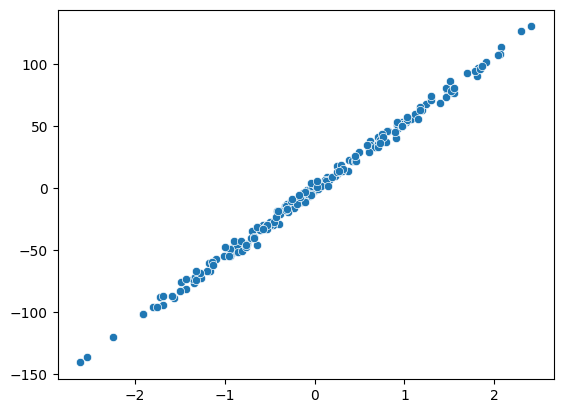

In [7]:
sns.scatterplot(x=df[0].reshape(df[0].shape[0]),y=df[1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression(fit_intercept=True).fit(X_train,y_train)
lin_reg

LinearRegression()

In [11]:
lin_reg.score(X,y)

0.9966041621138444

In [12]:
lin_reg.intercept_

-0.7840784693665728

In [13]:
b = float(lin_reg.intercept_)
b

-0.7840784693665728

In [14]:
a = float(lin_reg.coef_)
a

53.650955614693494

In [15]:
y_preds = a*X + b
# y_preds

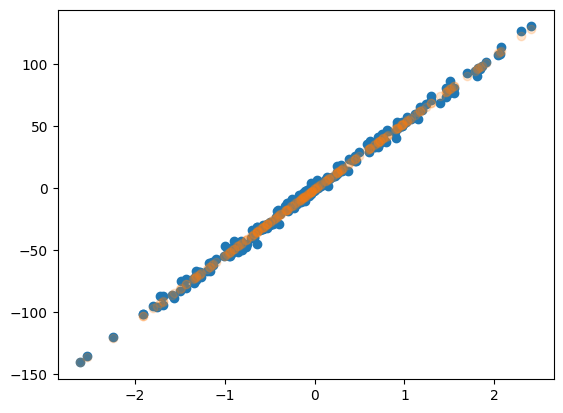

In [37]:
plt.scatter(X,y)
plt.scatter(X,y_preds,alpha=0.2)
# plt.plot(X,y,"g",alpha=0.3)
plt.show()

In [17]:
# np.allclose(grad,0)
feat = X_train

In [18]:
target = y_train

### The Function that I'm Working with

In [19]:
## function for an array of inputs
def descent(arr1,arr2):
    loss_lst = []
    my_dict = {}
    m,c = 0,0
    dl_dm,dl_dc = .0,.0
    l_rate = 0.001
    epochs = 100
    for i in range(epochs):
        for j in range(len(arr1)):
            lst = []
            y_hat = m * arr1[j] + c
            lst.append((arr2[j] - y_hat)**2)
            dl_dm += -2*arr1[j]*(arr2[j]-y_hat)
            dl_dc += -2*(arr2[j]-y_hat)
        zeta = np.sum(np.array(lst))/len(arr1)
        my_dict[zeta] = c,m
        loss_lst.append(zeta)
        m = m - l_rate*(1/len(arr1))*dl_dm
        c = c - l_rate*(1/len(arr1))*dl_dc
        minima = min(my_dict.keys())
    return loss_lst,c,m,my_dict,minima,my_dict[minima]       

In [20]:
descent(feat,target)
inter = descent(feat,target)[1]
slope = descent(feat,target)[2]
minimum = descent(feat,target)[4]
c_m = descent(feat,target)[5]

In [21]:
pd.DataFrame(descent(feat,target)[3]).transpose()
# descent(feat,target)[3]

,0,1
5.367752,0,0
5.348272,[-0.000616989465956749],[0.10702151493909633]
5.309456,[-0.0018516317827919901],[0.32085104432413913]
5.251591,[-0.0037052486084701896],[0.6410620131210746]
5.175105,[-0.0061798096680158576],[1.067015622809557]
...,...,...
0.708574,[-2.037025720402408],[76.83277857399828]
0.572564,[-2.0333905963582004],[74.6489746629839]
0.448607,[-2.027629117900922],[72.42330116423824]
0.337845,[-2.0197133494501176],[70.16019826722902]


In [22]:
 descent(feat,target)[3]

{5.36775214303763: (0, 0),
 5.348271966054736: (array([-0.00061699]), array([0.10702151])),
 5.30945577952827: (array([-0.00185163]), array([0.32085104])),
 5.2515908069142325: (array([-0.00370525]), array([0.64106201])),
 5.175105113499103: (array([-0.00617981]), array([1.06701562])),
 5.080564306700679: (array([-0.00927792]), array([1.59786213])),
 4.96866717656322: (array([-0.01300279]), array([2.23254252])),
 4.8402403104101515: (array([-0.01735822]), array([2.96979067])),
 4.696231723608202: (array([-0.02234858]), array([3.8081358])),
 4.537703556059851: (array([-0.02797874]), array([4.7459055])),
 4.365823891316414: (array([-0.03425408]), array([5.78122896])),
 4.181857762035116: (array([-0.04118039]), array([6.91204081])),
 3.987157411836955: (array([-0.04876387]), array([8.13608516])),
 3.783151889408336: (array([-0.05701106]), array([9.45092013])),
 3.5713360558833265: (array([-0.06592876]), array([10.85392272])),
 3.3532590911043387: (array([-0.07552403]), array([12.34229407]

In [23]:
inter

array([-1.99732555])

In [24]:
slope

array([65.5398292])

In [25]:
minimum

0.0005361060419745939

In [26]:
i = c_m[0]
s = c_m[1]

In [27]:
y_pred = float(slope) * X + float(inter)
# y_pred

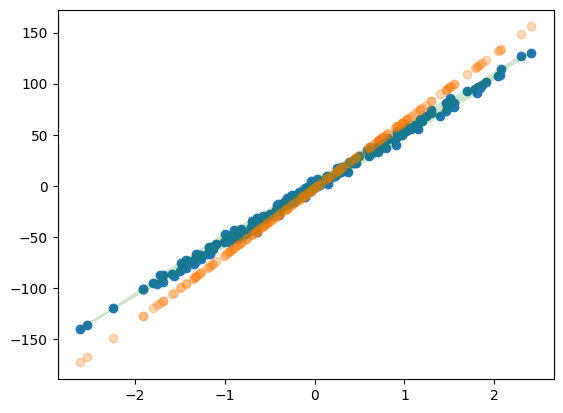

In [40]:
plt.scatter(X,y)
plt.scatter(X,y_pred,alpha=0.3)
plt.plot(X,y,"g",alpha=0.2)
plt.show()

In [29]:
y_p = s*X+i

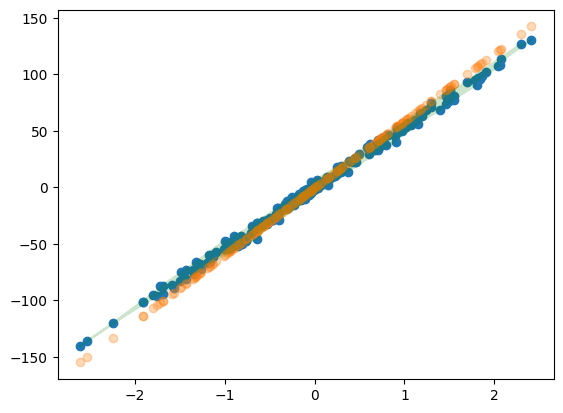

In [41]:
plt.scatter(X,y)
plt.scatter(X,y_p,alpha=0.3)
plt.plot(X,y,"g",alpha=0.2)
plt.show()

In [43]:
### Another way...

In [31]:
## function for an array of inputs
def descent_new(arr1,arr2):
    loss_lst = []
    my_dict = {}
    m,c = 0,0
    dl_dm,dl_dc = .0,.0
    l_rate = 0.001
    epochs = 600
    for j in range(len(arr1)):
        lst=[]
        y_hat = m * arr1[j] + c
        lst.append((arr2[j] - y_hat)**2)
        dl_dm += -2*arr1[j]*(arr2[j]-y_hat)
        dl_dc += -2*(arr2[j]-y_hat)
    dl_dm = dl_dm/len(arr1)
    dl_dc = dl_dc/len(arr1)
    zeta = np.sum(np.array(lst))/len(arr1)
    loss_lst.append(zeta)
    for i in range(epochs):
        m = m - l_rate*dl_dm
        c = c - l_rate*dl_dc
        my_dict[zeta] = c,m
    minima = min(my_dict.keys())
    return loss_lst,c,m,my_dict,minima,my_dict[minima]       

In [32]:
descent_new(feat,target)
inter_new = descent_new(feat,target)[1]
slope_new = descent_new(feat,target)[2]
minimum_new = descent_new(feat,target)[4]
c_m_new = descent_new(feat,target)[5]

In [33]:
c_m_new

(array([1.7673865]), array([98.1095534]))

In [34]:
inter_new

array([1.7673865])

In [35]:
slope_new

array([98.1095534])

In [36]:
minimum_new

2.609949039842538

In [37]:
descent(feat,target)[3]

{2.609949039842538: (0, 0),
 2.5954888959067293: (array([0.00294564]), array([0.16351592])),
 2.566723734603501: (array([0.00882269]), array([0.4901774])),
 2.523962276804681: (array([0.01760271]), array([0.97924453])),
 2.467663787952956: (array([0.02924317]), array([1.62960956])),
 2.398433540314689: (array([0.04368759]), array([2.4397994])),
 2.317016831044947: (array([0.0608657]), array([3.40797895])),
 2.22429161384584: (array([0.08069373]), array([4.53195525])),
 2.1212598154004714: (array([0.10307462]), array([5.8091825])),
 2.0090374204845443: (array([0.12789841]), array([7.23676775])),
 1.8888434215741505: (array([0.15504255]), array([8.81147753])),
 1.7619877397672536: (array([0.18437236]), array([10.52974512])),
 1.6298582338124503: (array([0.21574145]), array([12.38767868])),
 1.4939069228960038: (array([0.24899222]), array([14.38107003])),
 1.3556355564918374: (array([0.28395639]), array([16.5054042])),
 1.2165806709555935: (array([0.32045557]), array([18.75586967])),
 1.0

In [38]:
y_new = slope_new*X+inter_new

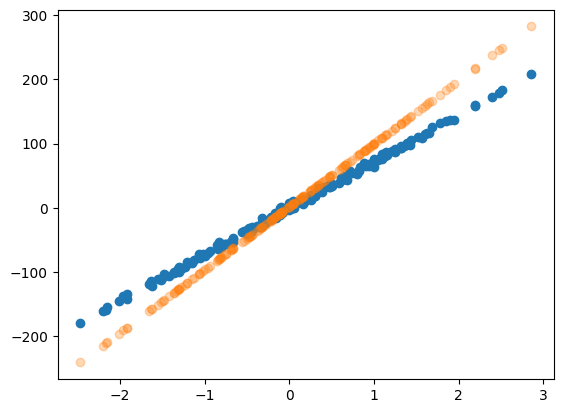

In [39]:
plt.scatter(X,y)
plt.scatter(X,y_new,alpha=0.3)
plt.show()

### Previous Attempts

In [40]:
# for i in range(epochs):
def grad_dec():
    for i in range(df[0].shape[0]):
        m,c = 0,0
        y_hat = m * feat[i] + c
        loss = np.sum((target[i] - y_hat[i])**2/df[0].shape[0])
#         dfunc = nd.Gradient(loss_mse)

In [41]:
# Original Loss Fucntion
def loss_mse():
    lst = []
    m,c = 0,0
    for i in range(df[0].shape[0]):
        y_hat = m * feat[i] + c
        loss = (target[i] - y_hat)**2/df[0].shape[0]
        lst.append(loss)
        i+=1
    return np.sum(np.array(lst))

In [42]:
# loss_mse()

In [ ]:
np.allclose

In [ ]:
df[0].shape[0]+1

In [ ]:
def thetasVsloss():
    loss_lst = []
    for j in range(0,11):
        m,c= j,j
        lst = []
        for i in range(df[0].shape[0]):
            y_hat = m * feat[i] + c
            lst.append((target[i] - y_hat)**2)
            i+=1
        zeta = np.sum(np.array(lst))/df[1].shape[0]
        loss_lst.append(zeta)
        print(f"Loss for slope = {m} and incercept = {c} the MSE is {zeta}")
        j+=1
    return loss_lst,len(loss_lst)

In [ ]:
thetasVsloss()

In [ ]:
## function fro an array of inputs
def thetaVsloss(arr):
    loss_lst = []
    for j in range(len(arr)):
        m,c= j,j
        lst = []
        for i in range(df[0].shape[0]):
            y_hat = m * feat[i] + c
            lst.append((target[i] - y_hat)**2)
            i+=1
        zeta = np.sum(np.array(lst))/df[1].shape[0]
        loss_lst.append(zeta)
#         print(f"Loss for slope = {m} and incercept = {c} the MSE is {zeta}")
        j+=1
    return loss_lst,len(loss_lst)

In [ ]:
thetaVsloss(np.arange(0,15))[0]

In [ ]:
plt.figure(figsize=(5,5))
inpts = np.arange(0,14)
plt.plot(inpts,thetaVsloss(inpts)[0])
plt.show()

In [ ]:
## function form an array of inputs
def thetaVsloss_new(arr):
    loss_lst = []
    for j in range(len(arr)):
        m,c= j,j
        lst = []
        for i in range(df[0].shape[0]):
            y_hat = m * feat[i] + c
            lst.append((target[i] - y_hat)**2)
            i+=1
        zeta = np.sum(np.array(lst))/df[1].shape[0]
        loss_lst.append(zeta)
#         print(f"Loss for slope = {m} and incercept = {c} the MSE is {zeta}")
        j+=1
    return loss_lst,len(loss_lst)

In [ ]:
# def sum_sq(x,y):return x**2+y**2

In [ ]:
# def sq(x):return x**2

In [ ]:
# sum_sq(2,4)

In [ ]:
# grad = nd.Gradient(sq)([1,1])

In [ ]:
# grad